In [10]:
import pandas as pd

csv_dir = '/mnt/hgfs/VM_share/liver_project/csv_to_github/'
csv_path = 'Liver_attenuation_AI_vs_Manualx4_100.csv'
data = pd.read_csv(csv_dir + csv_path)

print(data.shape)
data.head()

(100, 8)


,CT_id,nnunet_to_roi,nnunet_to_3d,nnunet_to_2d,density_zz,density_fx,density_nz,density_zw
0,covid_0700,50.85702,52.90228,51.26072,54.3750,49.6553,51.7850,51.7168
1,covid_0701,55.18537,57.69963,56.67069,61.8749,61.6311,57.4131,61.4796
2,covid_0702,44.04323,48.89912,46.94244,45.2676,47.2924,46.3496,46.6897
3,covid_0703,36.60765,39.93153,39.90219,38.1466,38.5392,38.3394,39.1357
4,covid_0704,56.26933,55.38742,55.31121,56.8147,58.3754,60.2526,57.4434


In [11]:
methods = list(data)[1:]
methods = [ 'density_zz', 'density_nz', 'density_zw', 'density_fx',
           'nnunet_to_roi', 'nnunet_to_3d', 'nnunet_to_2d']

In [15]:
# create a new dataframe for sns plot

df_agreements = pd.DataFrame()

for rowname,row in data.iterrows():
    for i in range(len(methods)):
        
        ct_id = row['CT_id']
        liver_density = round(row[methods[i]],5)
        df = pd.DataFrame({ 'methods' : methods[i],
                            'CT_id' : row['CT_id'], 
                            'liver_density':round(liver_density,5)},index=[0])
        df_agreements  = df_agreements.append(df)
        print(ct_id, df_agreements.shape, '\n')


covid_0700 (1, 3) 

covid_0700 (2, 3) 

covid_0700 (3, 3) 

covid_0700 (4, 3) 

covid_0700 (5, 3) 

covid_0700 (6, 3) 

covid_0700 (7, 3) 

covid_0701 (8, 3) 

covid_0701 (9, 3) 

covid_0701 (10, 3) 

covid_0701 (11, 3) 

covid_0701 (12, 3) 

covid_0701 (13, 3) 

covid_0701 (14, 3) 

covid_0702 (15, 3) 

covid_0702 (16, 3) 

covid_0702 (17, 3) 

covid_0702 (18, 3) 

covid_0702 (19, 3) 

covid_0702 (20, 3) 

covid_0702 (21, 3) 

covid_0703 (22, 3) 

covid_0703 (23, 3) 

covid_0703 (24, 3) 

covid_0703 (25, 3) 

covid_0703 (26, 3) 

covid_0703 (27, 3) 

covid_0703 (28, 3) 

covid_0704 (29, 3) 

covid_0704 (30, 3) 

covid_0704 (31, 3) 

covid_0704 (32, 3) 

covid_0704 (33, 3) 

covid_0704 (34, 3) 

covid_0704 (35, 3) 

covid_0705 (36, 3) 

covid_0705 (37, 3) 

covid_0705 (38, 3) 

covid_0705 (39, 3) 

covid_0705 (40, 3) 

covid_0705 (41, 3) 

covid_0705 (42, 3) 

covid_0706 (43, 3) 

covid_0706 (44, 3) 

covid_0706 (45, 3) 

covid_0706 (46, 3) 

covid_0706 (47, 3) 

covid_0706 (48, 3) 

c

covid_italy_32 (404, 3) 

covid_italy_32 (405, 3) 

covid_italy_32 (406, 3) 

covid_italy_33 (407, 3) 

covid_italy_33 (408, 3) 

covid_italy_33 (409, 3) 

covid_italy_33 (410, 3) 

covid_italy_33 (411, 3) 

covid_italy_33 (412, 3) 

covid_italy_33 (413, 3) 

covid_italy_34 (414, 3) 

covid_italy_34 (415, 3) 

covid_italy_34 (416, 3) 

covid_italy_34 (417, 3) 

covid_italy_34 (418, 3) 

covid_italy_34 (419, 3) 

covid_italy_34 (420, 3) 

covid_italy_35 (421, 3) 

covid_italy_35 (422, 3) 

covid_italy_35 (423, 3) 

covid_italy_35 (424, 3) 

covid_italy_35 (425, 3) 

covid_italy_35 (426, 3) 

covid_italy_35 (427, 3) 

covid_italy_36 (428, 3) 

covid_italy_36 (429, 3) 

covid_italy_36 (430, 3) 

covid_italy_36 (431, 3) 

covid_italy_36 (432, 3) 

covid_italy_36 (433, 3) 

covid_italy_36 (434, 3) 

covid_italy_37 (435, 3) 

covid_italy_37 (436, 3) 

covid_italy_37 (437, 3) 

covid_italy_37 (438, 3) 

covid_italy_37 (439, 3) 

covid_italy_37 (440, 3) 

covid_italy_37 (441, 3) 

covid_italy_

In [16]:
print(df_agreements.shape)
df_agreements.head()

(700, 3)


,methods,CT_id,liver_density
0,density_zz,covid_0700,54.37500
0,density_nz,covid_0700,51.78500
0,density_zw,covid_0700,51.71680
0,density_fx,covid_0700,49.65530
0,nnunet_to_roi,covid_0700,50.85702


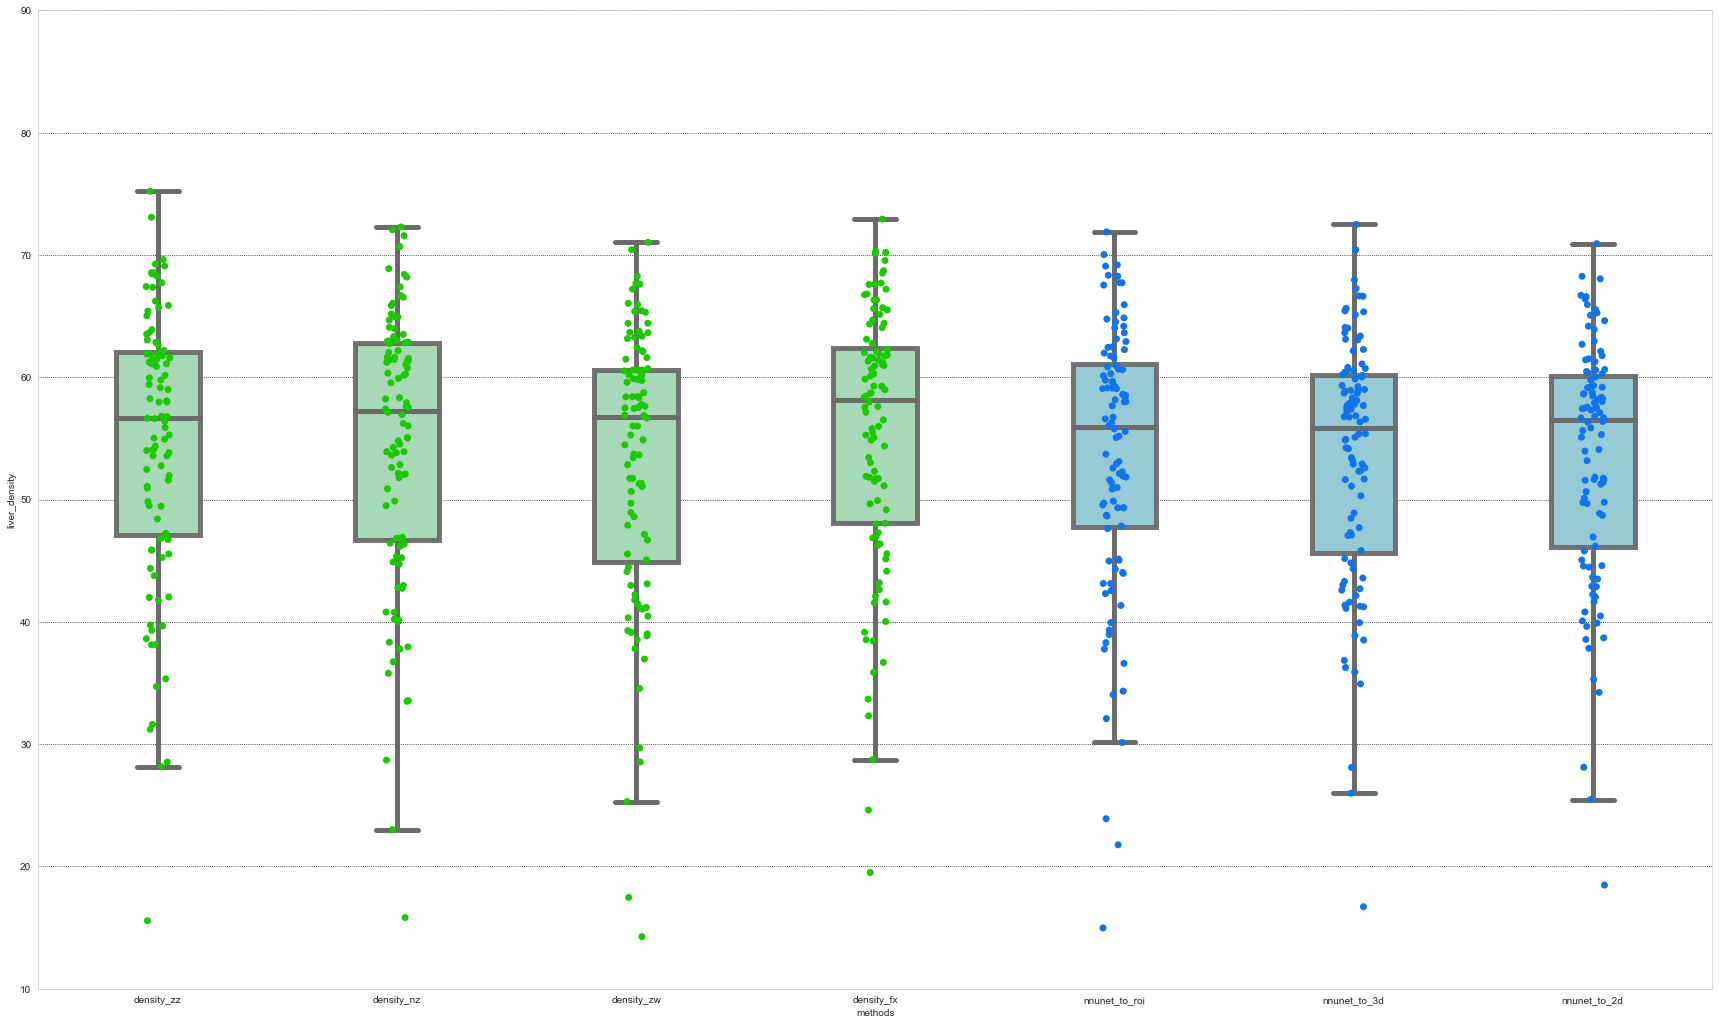

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,18)) 

reader_color_1 = '#99e0b0ff' # green
AI_color_1 = '#84d1e0ff'  #blue 2bd5ffff

sns.set_style( 'whitegrid',{"grid.color": ".0", "grid.linestyle": ":"})

ax = sns.boxplot(x = 'methods',  y = 'liver_density' , data = df_agreements, showfliers = False, \
            palette =[reader_color_1,reader_color_1,reader_color_1,reader_color_1,
                      AI_color_1 ,AI_color_1 ,AI_color_1],
                 boxprops=dict(alpha=.95),      
                 linewidth = 5,
                 width=0.35)
    
sns.stripplot(x = 'methods',  y = 'liver_density' , data = df_agreements, jitter= 0.05 , 
            palette =[reader_color,reader_color,reader_color,reader_color,AI_color ,AI_color ,AI_color],
              size=7,  alpha= 0.999)
 
plt.ylim(0,120)
plt.ylim(10,90)
# plt.savefig( 'AI_ROI vs manual ROI -inter-reader.png', dpi = 500)
plt.show()

In [19]:
from scipy import stats
import numpy as np

for i in range(len(methods)):
    col_x, density_x   = methods[i], data[methods[i]]
    print(col_x,'mean:::' ,np.mean(density_x))

density_zz mean::: 54.665618
density_nz mean::: 54.532266
density_zw mean::: 53.010577999999995
density_fx mean::: 55.20598000000001
nnunet_to_roi mean::: 53.4558436
nnunet_to_3d mean::: 53.200658600000004
nnunet_to_2d mean::: 53.301931200000006


In [21]:
from scipy import stats  # compare the statistical difference between every two groups

for i in range(len(methods)):
    for j in range(len(methods)):
        col_x, density_x   = methods[i], data[methods[i]]
        col_y, density_y  = methods[j], data[methods[j]]    

        if i != j :       
#             print(col_x, col_y)
            cor = stats.spearmanr(density_x, density_y)[0]
#             print(col_x, col_y, 'cor',cor)
            ks_s, ks_p = stats.ks_2samp(density_x, density_y)
            if ks_p >0.05:
                print(col_x, 'vs', col_y, '\t\t:ks_p_value',ks_p,' Not Significant \n')
            if ks_p <=0.05:
                print(col_x, 'vs', col_y, '\t:ks_p_value',ks_p,' Significant \n')
    print('\n\n\n\n')

density_zz vs density_nz 		:ks_p_value 0.999998821968263  Not Significant 

density_zz vs density_zw 		:ks_p_value 0.2819416298082479  Not Significant 

density_zz vs density_fx 		:ks_p_value 0.9942356257694902  Not Significant 

density_zz vs nnunet_to_roi 		:ks_p_value 0.469506448503778  Not Significant 

density_zz vs nnunet_to_3d 		:ks_p_value 0.05390207893129876  Not Significant 

density_zz vs nnunet_to_2d 		:ks_p_value 0.07822115797841851  Not Significant 






density_nz vs density_zz 		:ks_p_value 0.999998821968263  Not Significant 

density_nz vs density_zw 		:ks_p_value 0.21117008625127576  Not Significant 

density_nz vs density_fx 		:ks_p_value 0.9942356257694902  Not Significant 

density_nz vs nnunet_to_roi 		:ks_p_value 0.36818778606286096  Not Significant 

density_nz vs nnunet_to_3d 		:ks_p_value 0.05390207893129876  Not Significant 

density_nz vs nnunet_to_2d 		:ks_p_value 0.05390207893129876  Not Significant 






density_zw vs density_zz 		:ks_p_value 0.28194162